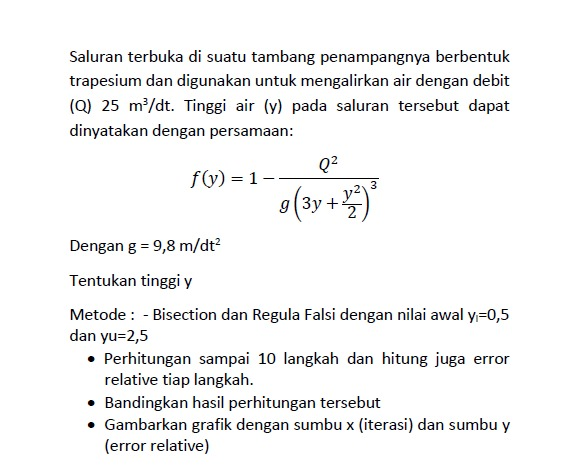

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [96]:
def function(q, g, y):
  return (1 - ((q**2)/(g*(3*y+((y**2)/2))**3)))

In [97]:
# BISECTION
xl, xu = 0.5, 2.5
iteration = 10
q = 25
g = 9.8

data = {
    # 'iteration' : list(),
    'xl'        : list(),
    'xu'        : list(),
    'xm'        : list(),
    '|error|'   : list(),
    'lower'     : list(),
    'upper'     : list(),
    'F(xm)'     : list()
}

data_bisection = data

def insert_data(xl, xu, xm, ea, lower, upper, fxm):
  # data['iteration'].append(i)
  data['xl'].append(xl)
  data['xu'].append(xu)
  data['xm'].append(xm)
  data['|error|'].append(ea)
  data['lower'].append(lower)
  data['upper'].append(upper)
  data['F(xm)'].append(fxm)

# print("i | xl | xu | xm | Ea% | f(xm)")
for i in range(iteration):
  if i == 0:
    lower = function(q, g, xl)
    upper = function(q, g, xu)
    xm = (xl + xu) / 2
    xm_old = xm
    fxm = function(q, g, xm)
    # print(i + 1, xl, xu, xm, "-", end=" ")
    # print(fxm)
    ea = "-"
    insert_data(xl, xu, xm, ea, lower, upper, fxm)
  elif i > 0:
    if fxm * lower < 0:
      xu = xm
    elif fxm * upper < 0:
      xl = xm
    lower = function(q, g, xl)
    upper = function(q, g, xu)
    xm_old = xm
    xm = (xl + xu) / 2
    # print(xm, xm_old)
    ea = (xm - xm_old) / xm
    fxm = function(q, g, xm)
    # print(i + 1, xl, xu, xm, abs(ea), fxm)
    insert_data(xl, xu, xm, abs(ea), lower, upper, fxm)

df_bisection = pd.DataFrame(data_bisection)
print(df_bisection)

         xl     xu        xm   |error|      lower     upper     F(xm)
0  0.500000  2.500  1.500000         - -13.862568  0.946830  0.641667
1  0.500000  1.500  1.000000       0.5 -13.862568  0.641667 -0.487475
2  1.000000  1.500  1.250000       0.2  -0.487475  0.641667  0.314512
3  1.000000  1.250  1.125000  0.111111  -0.487475  0.314512  0.009324
4  1.000000  1.125  1.062500  0.058824  -0.487475  0.009324 -0.207485
5  1.062500  1.125  1.093750  0.028571  -0.207485  0.009324 -0.092351
6  1.093750  1.125  1.109375  0.014085  -0.092351  0.009324 -0.039955
7  1.109375  1.125  1.117188  0.006993  -0.039955  0.009324 -0.014940
8  1.117188  1.125  1.121094  0.003484  -0.014940  0.009324 -0.002716
9  1.121094  1.125  1.123047  0.001739  -0.002716  0.009324  0.003327


In [98]:
# REGULA FALSI
xl, xu = 0.5, 2.5
iteration = 10
q = 25
g = 9.8

data = {
    # 'iteration' : list(),
    'xl'        : list(),
    'xu'        : list(),
    'xm'        : list(),
    '|error|'   : list(),
    'lower'     : list(),
    'upper'     : list(),
    'F(xm)'     : list()
}

data_regulafalsi = data

def insert_data(xl, xu, xm, ea, lower, upper, fxm):
  # data['iteration'].append(i)
  data['xl'].append(xl)
  data['xu'].append(xu)
  data['xm'].append(xm)
  data['|error|'].append(ea)
  data['lower'].append(lower)
  data['upper'].append(upper)
  data['F(xm)'].append(fxm)

# print("i | xl | xu | xm | Ea% | f(xm)")
for i in range(iteration):
  if i == 0:
    lower = function(q, g, xl)
    upper = function(q, g, xu)
    xm = xu - ((upper*(xl-xu)) / (lower - upper))
    xm_old = xm
    fxm = function(q, g, xm)
    # print(i + 1, xl, xu, xm, "-", end=" ")
    # print(fxm)
    ea = "-"
    insert_data(xl, xu, xm, ea, lower, upper, fxm)
  elif i > 0:
    if fxm * lower < 0:
      xu = xm
    elif fxm * upper < 0:
      xl = xm
    lower = function(q, g, xl)
    upper = function(q, g, xu)
    xm_old = xm
    xm = xu - ((upper*(xl-xu)) / (lower - upper))
    # print(xm, xm_old)
    ea = (xm - xm_old) / xm
    fxm = function(q, g, xm)
    # print(i + 1, xl, xu, xm, abs(ea), fxm)
    insert_data(xl, xu, xm, abs(ea), lower, upper, fxm)

df_regulafalsi = pd.DataFrame(data_regulafalsi)
print(df_regulafalsi)

    xl        xu        xm   |error|      lower     upper     F(xm)
0  0.5  2.500000  2.372131         - -13.862568  0.946830  0.934864
1  0.5  2.372131  2.253855  0.052477 -13.862568  0.934864  0.920751
2  0.5  2.253855  2.144619  0.050935 -13.862568  0.920751  0.904263
3  0.5  2.144619  2.043909  0.049273 -13.862568  0.904263  0.885196
4  0.5  2.043909  1.951240  0.047492 -13.862568  0.885196  0.863382
5  0.5  1.951240  1.866154  0.045594 -13.862568  0.863382  0.838707
6  0.5  1.866154  1.788215  0.043585 -13.862568  0.838707  0.811126
7  0.5  1.788215  1.717005  0.041473 -13.862568  0.811126  0.780678
8  0.5  1.717005  1.652123  0.039272 -13.862568  0.780678  0.747494
9  0.5  1.652123  1.593177  0.036999 -13.862568  0.747494  0.711808


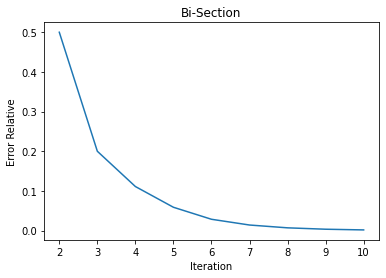

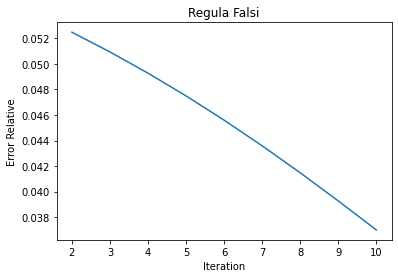

In [99]:
# Plot
plt.plot(np.arange(2, 11), np.array(data_bisection["|error|"][1:]))
# plt.plot(np.arange(2, 11), np.array(data_regulafalsi["|error|"][1:]))
plt.xlabel("Iteration")
plt.ylabel("Error Relative")
plt.title("Bi-Section")
plt.show()

# plt.plot(np.arange(2, 11), np.array(data_bisection["|error|"][1:]))
plt.plot(np.arange(2, 11), np.array(data_regulafalsi["|error|"][1:]))
plt.xlabel("Iteration")
plt.ylabel("Error Relative")
plt.title("Regula Falsi")
plt.show()

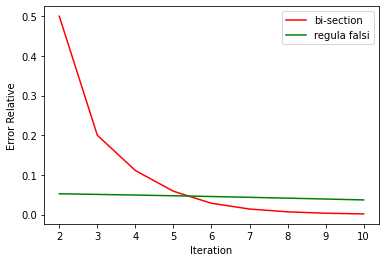

In [100]:
# Plot
plt.plot(np.arange(2, 11), np.array(data_bisection["|error|"][1:]), color="r", label="bi-section")
plt.plot(np.arange(2, 11), np.array(data_regulafalsi["|error|"][1:]), color="g", label="regula falsi")
plt.xlabel("Iteration")
plt.ylabel("Error Relative")
plt.legend()
plt.show()